In [2]:
import matplotlib.pyplot as plt
import pickle
import datetime as dt
import numpy as np
import pandas as pd

/Users/Sam/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
from sklearn.linear_model import LinearRegression

In [5]:
#load the data
tsla = pickle.load(open("data_h.pickle","rb"))
print(tsla.head())
print("\n Dataframe size = ",tsla.shape)
print("\n first index = ",tsla.index[0], "; last index = ", tsla.index[-1], "; second index = ",tsla.index[1])
tsla = tsla.drop(['High','Low','Close','Volume','Dividends','Stock Splits'],axis=1) #just gonna look at Open prices for now

                 Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-02-11  62.349998  63.700001  62.135998  63.167999  3140581          0   
2019-02-11  63.153004  63.338001  62.640003  62.902000   876534          0   
2019-02-11  62.935997  63.296001  62.730000  63.250000   801005          0   
2019-02-11  63.230000  63.412640  62.937798  62.956001   563722          0   
2019-02-11  62.996002  63.035999  62.690002  62.840981   513318          0   

            Stock Splits  
Date                      
2019-02-11           0.0  
2019-02-11           0.0  
2019-02-11           0.0  
2019-02-11           0.0  
2019-02-11           0.0  

 Dataframe size =  (3518, 7)

 first index =  2019-02-11 00:00:00 ; last index =  2021-02-10 00:00:00 ; second index =  2019-02-11 00:00:00


In [6]:
tsla.columns=['t']

In [25]:
tsla['t-1'] = tsla['t'].shift(1)
tsla['t-2'] = tsla['t'].shift(2)
tsla['t-3'] = tsla['t'].shift(3)
tsla['t-4'] = tsla['t'].shift(4)
tsla['t-5'] = tsla['t'].shift(5)
tsla['t-6'] = tsla['t'].shift(6)
tsla['t-7'] = tsla['t'].shift(7)
tsla['t+1'] = tsla['t'].shift(-1)
tsla['t+2'] = tsla['t'].shift(-2)
tsla['t+3'] = tsla['t'].shift(-3)
tsla['t+4'] = tsla['t'].shift(-4)
tsla['t+5'] = tsla['t'].shift(-5)
tsla['t+6'] = tsla['t'].shift(-6)

In [24]:
tsla.head()

,t,t-1,t-2,t-3,t-4,t-5,t+1,t+2,t+3,t+4
Date,,,,,,,,,,
2019-02-11,62.349998,NaN,NaN,NaN,NaN,NaN,63.153004,62.935997,63.230000,62.996002
2019-02-11,63.153004,62.349998,NaN,NaN,NaN,NaN,62.935997,63.230000,62.996002,62.826836
2019-02-11,62.935997,63.153004,62.349998,NaN,NaN,NaN,63.230000,62.996002,62.826836,62.770000
2019-02-11,63.230000,62.935997,63.153004,62.349998,NaN,NaN,62.996002,62.826836,62.770000,63.230000
2019-02-11,62.996002,63.230000,62.935997,63.153004,62.349998,NaN,62.826836,62.770000,63.230000,62.967999


In [26]:
y = tsla.dropna()[['t','t+1','t+2','t+3','t+4','t+5','t+6']].to_numpy() #.reshape(-1,1)
x = tsla.dropna()[['t-1','t-2','t-3','t-4','t-5','t-6','t-7']].to_numpy() #.reshape(-1,1)
model = LinearRegression().fit(x, y)
print('intercept : ', model.intercept_ , 'coefs : ', model.coef_)

intercept :  [0.04330794 0.08155807 0.13251663 0.18690737 0.24001804 0.29529486
 0.35567669] coefs :  [[ 9.50529727e-01  5.15666790e-02  3.71350495e-02 -5.32292097e-02
   1.03871684e-02  1.05325454e-01 -1.00944427e-01]
 [ 9.54609314e-01  8.59163291e-02 -1.50633480e-02 -4.22470240e-02
   1.12488822e-01 -4.99218825e-02 -4.42114030e-02]
 [ 9.93287493e-01  3.44376347e-02 -4.54696510e-03  6.16169970e-02
  -4.41941321e-02 -4.48464871e-03 -3.38289439e-02]
 [ 9.78557097e-01  4.69972239e-02  1.01297011e-01 -9.71988648e-02
   7.09729341e-04 -3.87260013e-03 -2.34572509e-02]
 [ 9.76992997e-01  1.52016414e-01 -5.73470325e-02 -5.20423830e-02
   5.25900555e-04 -7.01075888e-03 -9.35175766e-03]
 [ 1.08055834e+00 -6.64283221e-03 -1.20863331e-02 -5.19925375e-02
  -3.12508566e-03  3.74622102e-04 -2.56233400e-03]
 [ 1.02036833e+00  4.39880701e-02 -8.23396593e-03 -6.10380502e-02
   5.25665611e-03  1.75315476e-02 -1.25334091e-02]]


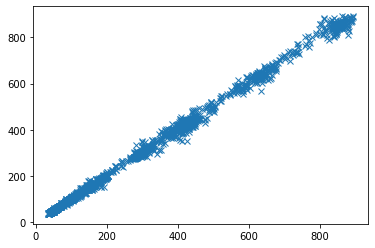

In [22]:
plt.plot(tsla['t-4'],tsla['t'],'x')

In [67]:
x_new = tsla[['t-7','t-6','t-5','t-4','t-3','t-2','t-1']].iloc[-1].to_numpy()

In [68]:
#print(tsla.iloc[-7:-1])
print(x_new)

[844.32000732 844.60998535 843.         817.91998291 813.63000488
 813.90002441 810.20001221]


In [69]:
y_new=model.predict(x_new.reshape(1,-1))

In [70]:
print(y_new[0])

[846.30644394 846.46278353 847.42013338 850.40953657 849.76431766
 849.99343909 850.55169301]


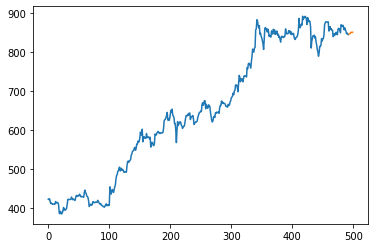

In [72]:
start = -500
end = -7
length = -start+end
plt.plot(range(length),tsla['t'].iloc[start:end].to_numpy())
plt.plot(range(length,length+7),y_new[0])
plt.show()

In [86]:
#tsla = tsla['t']
tsla.columns=['t']
tsla.head()

,t
Date,
2019-02-11,62.349998
2019-02-11,63.153004
2019-02-11,62.935997
2019-02-11,63.230000
2019-02-11,62.996002


In [87]:
tsla['t']

Date
2019-02-11     62.349998
2019-02-11     63.153004
2019-02-11     62.935997
2019-02-11     63.230000
2019-02-11     62.996002
                 ...    
2021-02-10    817.919983
2021-02-10    813.630005
2021-02-10    813.900024
2021-02-10    810.200012
2021-02-10    809.669983
Name: t, Length: 3518, dtype: float64

In [7]:
for i in range(1,36):
    name = 't-'+str(i)
    print(name)
    tsla[name] = tsla['t'].shift(i)
for i in range(1,35):
    name = 't+'+str(i)
    print(name)
    tsla[name] = tsla['t'].shift(-i)

t-1
t-2
t-3
t-4
t-5
t-6
t-7
t-8
t-9
t-10
t-11
t-12
t-13
t-14
t-15
t-16
t-17
t-18
t-19
t-20
t-21
t-22
t-23
t-24
t-25
t-26
t-27
t-28
t-29
t-30
t-31
t-32
t-33
t-34
t-35
t+1
t+2
t+3
t+4
t+5
t+6
t+7
t+8
t+9
t+10
t+11
t+12
t+13
t+14
t+15
t+16
t+17
t+18
t+19
t+20
t+21
t+22
t+23
t+24
t+25
t+26
t+27
t+28
t+29
t+30
t+31
t+32
t+33
t+34


In [5]:
import statsmodels.api as sm

In [8]:
y_cols = ['t']+['t+'+str(i) for i in range(1,35)]
print('y_cols = ',y_cols)
x_cols = ['t-'+str(i) for i in range(1,36)]
x_cols.reverse()
print('x_cols = ',x_cols)
y = tsla.dropna()[y_cols].to_numpy() #.reshape(-1,1)
x = tsla.dropna()[x_cols].to_numpy() #.reshape(-1,1)
model = LinearRegression().fit(x, y)
print(model.summary())
#print('intercept : ', model.intercept_ , 'coefs : ', model.coef_)

y_cols =  ['t', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8', 't+9', 't+10', 't+11', 't+12', 't+13', 't+14', 't+15', 't+16', 't+17', 't+18', 't+19', 't+20', 't+21', 't+22', 't+23', 't+24', 't+25', 't+26', 't+27', 't+28', 't+29', 't+30', 't+31', 't+32', 't+33', 't+34']
x_cols =  ['t-35', 't-34', 't-33', 't-32', 't-31', 't-30', 't-29', 't-28', 't-27', 't-26', 't-25', 't-24', 't-23', 't-22', 't-21', 't-20', 't-19', 't-18', 't-17', 't-16', 't-15', 't-14', 't-13', 't-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1']


AttributeError: 'LinearRegression' object has no attribute 'summary'

In [14]:
y_cols = ['t']+['t+'+str(i) for i in range(1,35)]
print('y_cols = ',y_cols)
x_cols = ['t-'+str(i) for i in range(1,36)]
x_cols.reverse()
print('x_cols = ',x_cols)
y = tsla.dropna()[y_cols].to_numpy() #.reshape(-1,1)
x = tsla.dropna()[x_cols].to_numpy() #.reshape(-1,1)
x = sm.add_constant(x)
sm_model = sm.OLS(x,y)
res = sm_model.fit()
print(res.summary())
#print('intercept : ', model.intercept_ , 'coefs : ', model.coef_)

y_cols =  ['t', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8', 't+9', 't+10', 't+11', 't+12', 't+13', 't+14', 't+15', 't+16', 't+17', 't+18', 't+19', 't+20', 't+21', 't+22', 't+23', 't+24', 't+25', 't+26', 't+27', 't+28', 't+29', 't+30', 't+31', 't+32', 't+33', 't+34']
x_cols =  ['t-35', 't-34', 't-33', 't-32', 't-31', 't-30', 't-29', 't-28', 't-27', 't-26', 't-25', 't-24', 't-23', 't-22', 't-21', 't-20', 't-19', 't-18', 't-17', 't-16', 't-15', 't-14', 't-13', 't-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1']


ValueError: shapes (3449,36) and (3449,36) not aligned: 36 (dim 1) != 3449 (dim 0)

In [95]:
x_new = tsla[x_cols].iloc[-1].to_numpy()
y_new=model.predict(x_new.reshape(1,-1))

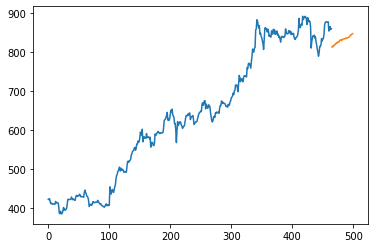

855.469970703125


In [99]:
start = -500
end = -35
length = -start+end
plt.plot(range(length),tsla['t'].iloc[start:end].to_numpy())
plt.plot(range(length,length+35),y_new[0])
plt.show()
print(tsla['t'].iloc[end])

# Loading the data and correcting the time

In [126]:
tsla = pickle.load(open("data_h.pickle","rb"))

def add_hour(x):
    x = x.to_pydatetime() + dt.timedelta(hours=1)
    return pd.Timestamp(x)

tsla = tsla.reset_index()
while tsla.duplicated(subset='Date').any() == True:
    tsla_duplicated = tsla.duplicated(subset='Date')
    tsla.loc[tsla_duplicated,'Date'] = tsla[tsla_duplicated]['Date'].apply(add_hour)   
for i in range(10):
    tsla.loc[:,'Date'] = tsla[:]['Date'].apply(add_hour)    
#tsla.set_index('Date',inplace=True)
print(tsla.head())

                 Date       Open       High        Low      Close   Volume  \
0 2019-02-11 10:00:00  62.349998  63.700001  62.135998  63.167999  3140581   
1 2019-02-11 11:00:00  63.153004  63.338001  62.640003  62.902000   876534   
2 2019-02-11 12:00:00  62.935997  63.296001  62.730000  63.250000   801005   
3 2019-02-11 13:00:00  63.230000  63.412640  62.937798  62.956001   563722   
4 2019-02-11 14:00:00  62.996002  63.035999  62.690002  62.840981   513318   

   Dividends  Stock Splits  
0          0           0.0  
1          0           0.0  
2          0           0.0  
3          0           0.0  
4          0           0.0  


# Cut date for training/test set

In [127]:
cut_date = dt.datetime(year=2021,month=1,day=4,hour=10)
print('cut date = ',cut_date)
print(pd.Timestamp(cut_date))
cut_idx = tsla.index[tsla['Date'] == pd.Timestamp(cut_date)].values[0]
print('cut index = ',cut_idx)

cut date =  2021-01-04 10:00:00
2021-01-04 10:00:00
cut index =  3330


# First linear regression atempt
building the features matrix and response vector

In [158]:
response = tsla['Open']
t = tsla.index
variables = {
    't':t,
    't2':t**2,
    't3':t**3,
    'et':np.exp(1/1000*t)
}
features = pd.DataFrame(variables) #the 1/1000 cst is kinda random... (it's just to get an exponential term)
features = sm.add_constant(features)

In [159]:
y_train = response[:cut_idx]
x_train = features[:cut_idx]
sm_model = sm.OLS(y_train,x_train)
res = sm_model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 2.392e+04
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:16:27   Log-Likelihood:                -16158.
No. Observations:                3330   AIC:                         3.233e+04
Df Residuals:                    3325   BIC:                         3.236e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8279      3.142     13.950      0.0

# prediction

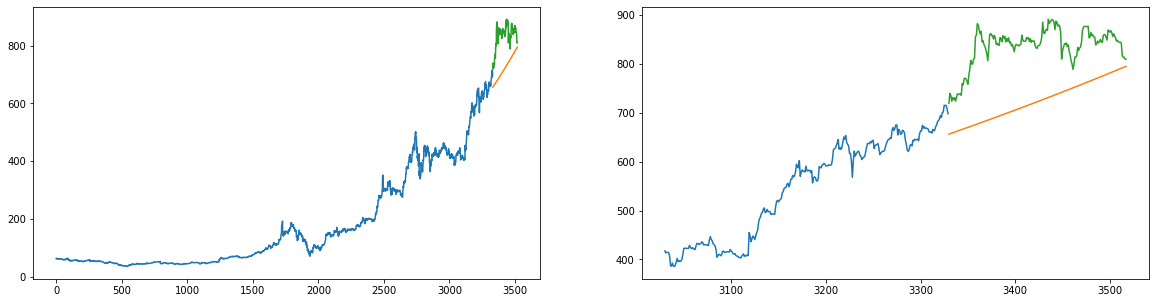

In [160]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:]
x_test = features[cut_idx:]
y_test = res.predict(x_test)

axs[0].plot(x_train['t'],y_train)
axs[0].plot(x_test['t'],y_test)
axs[0].plot(x_test['t'],y_test_true)

axs[1].plot(x_train['t'][-300:],y_train[-300:])
axs[1].plot(x_test['t'],y_test)
axs[1].plot(x_test['t'],y_test_true)

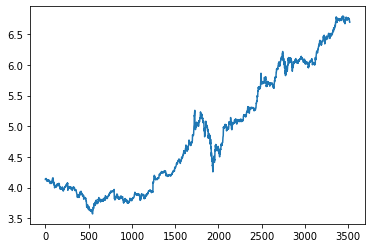

In [164]:
plt.plot(features['t'],np.log(response))